In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
90%,0.000000,0.573948,0.626428,0.620590,0.623153,0.623088,0.999192,0.797713,0.809588,0.303720,...,0.844854,1.360300e-02,0.624699,0.623152,0.843529,0.285573,0.027278,0.566989,1.0,0.086886
95%,0.000000,0.601623,0.653892,0.647005,0.630395,0.630345,0.999263,0.797812,0.809670,0.303878,...,0.858853,2.987667e-02,0.625368,0.630394,0.844343,0.288898,0.027950,0.568319,1.0,0.116377
99%,1.000000,0.664382,0.720662,0.708394,0.652017,0.651990,0.999403,0.798157,0.809967,0.304820,...,0.888286,1.665520e-01,0.633377,0.652014,0.846425,0.300099,0.036506,0.572975,1.0,0.233943


In [4]:
print("Column names before renaming","\n", data.columns[:5],"\n")
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" " ,"_")
data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)
print("Column names after renaming","\n",data.columns[:5])

Column names before renaming 
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin'],
      dtype='object') 

Column names after renaming 
 Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin'],
      dtype='object')


In [5]:
data.drop(['Net_Income_Flag'],axis=1,inplace=True)

In [6]:
df1 = pd.DataFrame(data.Bankrupt.value_counts())
df2 = pd.DataFrame(100*data.Bankrupt.value_counts(normalize=True).astype(float))
tab = df1.merge(df2,left_index=True,right_index=True).rename(columns = {"Bankrupt_x" : "Count" , "Bankrupt_y" : "Percentage"})
print(tab)

   Count  Percentage
0   6599    96.77372
1    220     3.22628


In [7]:
## fn to separate only-fractional & other columns
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (data[col].max()<=1) & (data[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=data.drop(['Bankrupt'],axis=1))
non_fraction_columns = data.drop(['Bankrupt'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 70 	 # Other than Fraction-only Columns 24


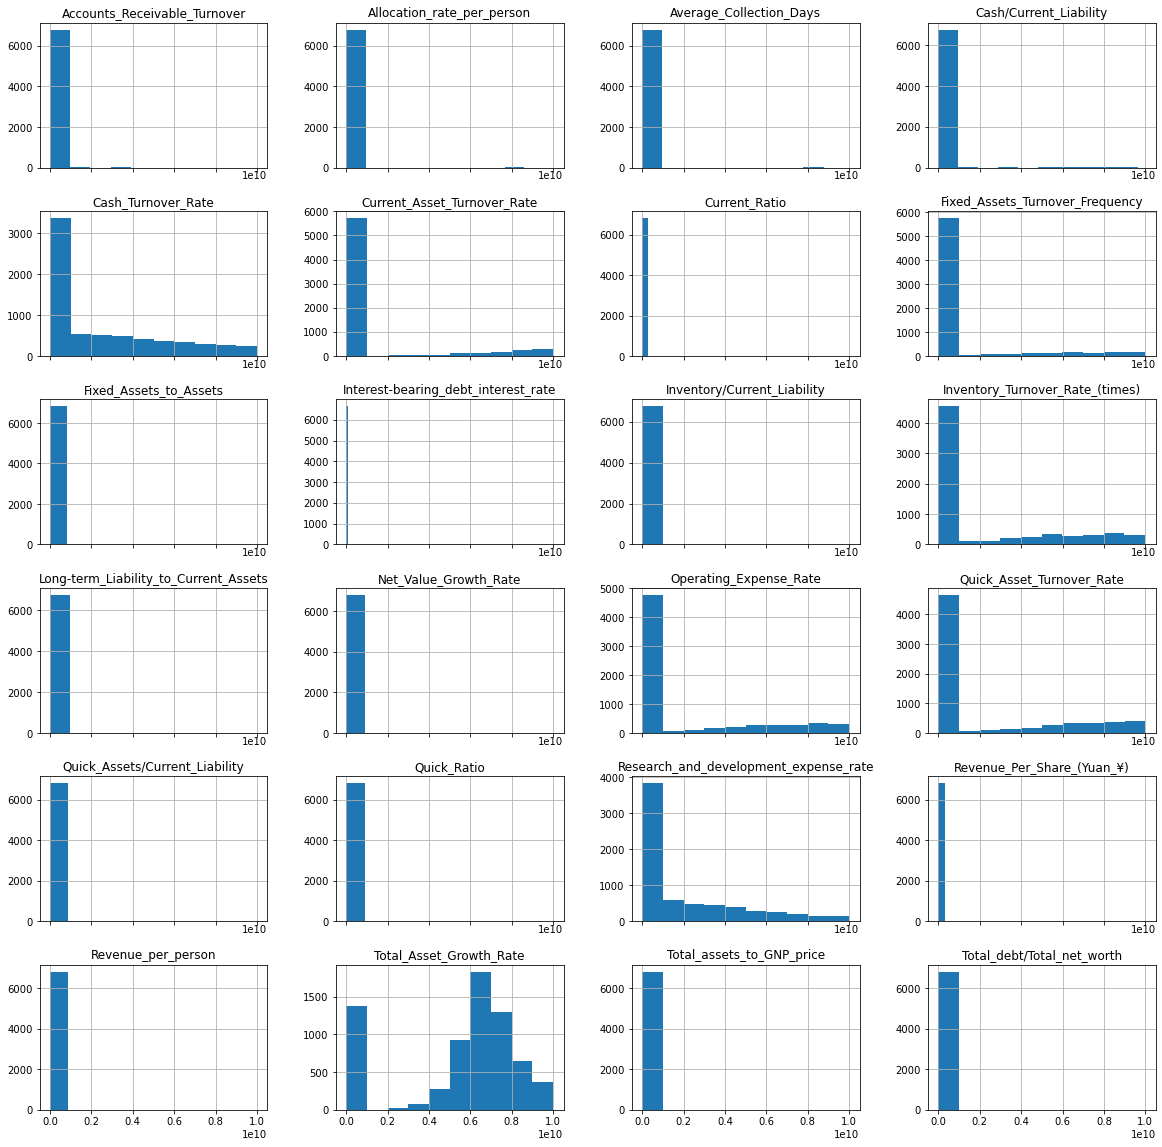

In [8]:
data[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

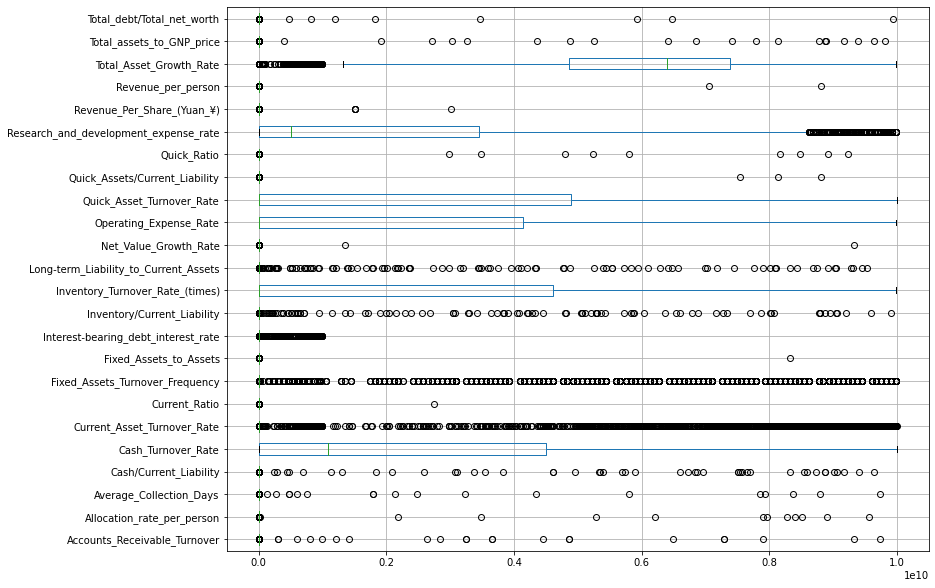

In [9]:
data[non_fraction_columns].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.show()

In [10]:
log_transformed_cols = []
for col in data[non_fraction_columns].columns:
    if (data[col].quantile(1) >= 100* data[col].quantile(0.99)) |  (sum(data[col] > data[col].quantile(0.99)) <= 10):
        data[col] = np.log1p(data[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + data[log_transformed_cols].columns
data.rename(columns={data[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)
#data.columns

The following features are log transformed after they fulfill outlier detection condition. 

 ['Accounts_Receivable_Turnover', 'Allocation_rate_per_person', 'Average_Collection_Days', 'Cash/Current_Liability', 'Current_Ratio', 'Fixed_Assets_to_Assets', 'Net_Value_Growth_Rate', 'Quick_Assets/Current_Liability', 'Quick_Ratio', 'Revenue_Per_Share_(Yuan_¥)', 'Revenue_per_person', 'Total_assets_to_GNP_price', 'Total_debt/Total_net_worth']


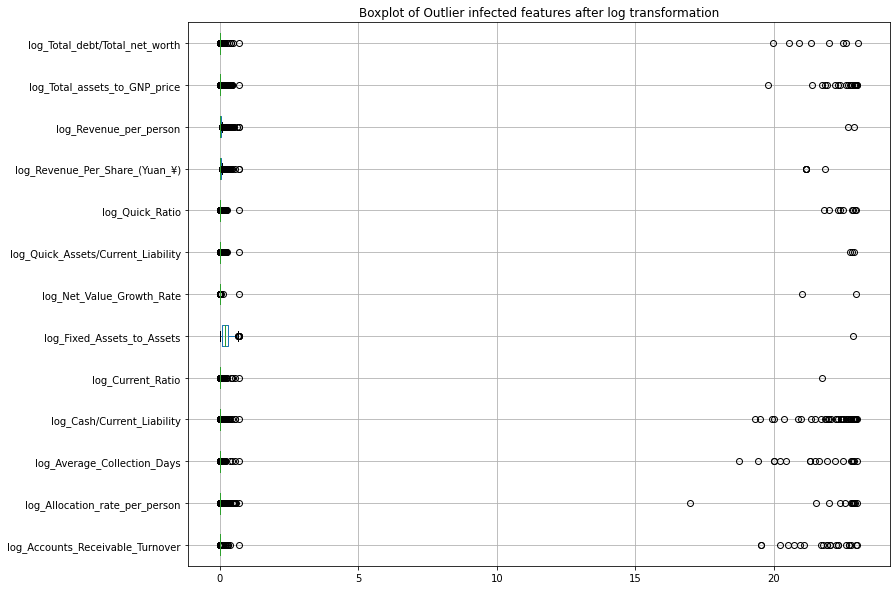

In [11]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
data[log_names].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

In [12]:
X = data.drop(["Bankrupt"],axis=1)
y = data.Bankrupt

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2 , mutual_info_classif 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics

In [14]:
X_scaled = pd.DataFrame(StandardScaler(copy=False).fit_transform(X))
X_scaled.columns = X.columns

In [15]:
x_train , x_test , y_train ,y_test = train_test_split(X_scaled,y,test_size= 0.33)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [17]:
pca.fit(X_scaled)

PCA(random_state=42, svd_solver='randomized')

In [18]:
pca.components_

array([[ 2.38492248e-01,  2.39656885e-01,  2.36623156e-01, ...,
        -7.16808144e-03,  1.46803617e-03,  6.55475890e-02],
       [ 7.52022844e-02,  8.13344934e-02,  7.17097241e-02, ...,
        -3.20547527e-03,  5.94283915e-03, -1.23966781e-01],
       [ 4.97016607e-02,  3.35949248e-02,  5.65650760e-02, ...,
         8.81095783e-03, -6.55132028e-03,  1.04569348e-01],
       ...,
       [-1.22128777e-15,  1.74971127e-16,  8.38520450e-16, ...,
        -6.99709798e-17,  9.39233131e-17,  2.56977932e-16],
       [ 0.00000000e+00,  5.92645009e-17, -6.64884736e-17, ...,
         1.19910618e-16, -2.49377096e-16,  4.05849550e-17],
       [ 0.00000000e+00, -2.25178383e-17, -4.49701302e-18, ...,
        -1.85906572e-16,  2.29036514e-16, -5.52455012e-17]])

In [19]:
colnames = list(X_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.238492,0.075202,ROA(C)_before_interest_and_depreciation_before...
1,0.239657,0.081334,ROA(A)_before_interest_and_%_after_tax
2,0.236623,0.071710,ROA(B)_before_interest_and_depreciation_after_tax
3,0.121123,-0.015757,Operating_Gross_Margin
4,0.120718,-0.016028,Realized_Sales_Gross_Margin


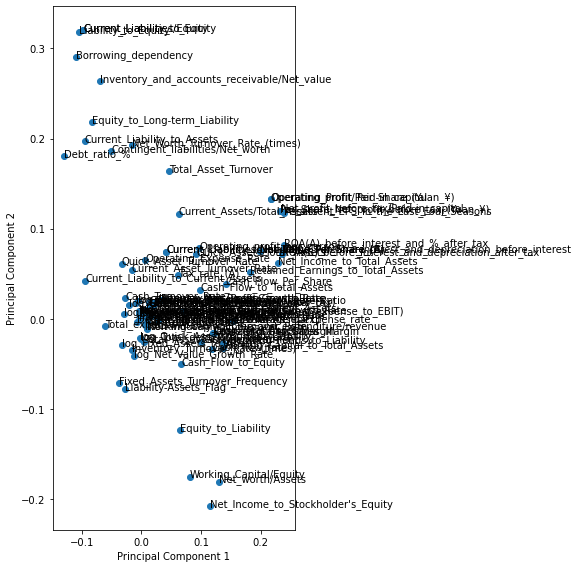

In [20]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [21]:
pca.explained_variance_ratio_

array([1.33661784e-01, 7.22864325e-02, 5.10449205e-02, 4.75732067e-02,
       4.23309620e-02, 3.26150671e-02, 3.07238196e-02, 2.93482902e-02,
       2.86810558e-02, 2.19639054e-02, 2.09606146e-02, 2.05151265e-02,
       1.80009676e-02, 1.78925851e-02, 1.67519612e-02, 1.51954176e-02,
       1.46210301e-02, 1.32980638e-02, 1.28589870e-02, 1.26785611e-02,
       1.23086162e-02, 1.19642015e-02, 1.15301954e-02, 1.12177411e-02,
       1.11554136e-02, 1.09751568e-02, 1.07575123e-02, 1.07144832e-02,
       1.05706777e-02, 1.04835828e-02, 1.03810016e-02, 1.03063825e-02,
       1.01844462e-02, 1.01019063e-02, 1.00629949e-02, 9.88577562e-03,
       9.68557498e-03, 9.25615229e-03, 9.08022894e-03, 8.73247435e-03,
       8.60325982e-03, 8.29700335e-03, 8.10776515e-03, 7.80481031e-03,
       7.64433483e-03, 7.46452412e-03, 7.22335695e-03, 6.87402164e-03,
       6.26962111e-03, 6.14834573e-03, 5.73545538e-03, 5.54435265e-03,
       5.38280808e-03, 5.06817443e-03, 4.59699389e-03, 4.14009882e-03,
      

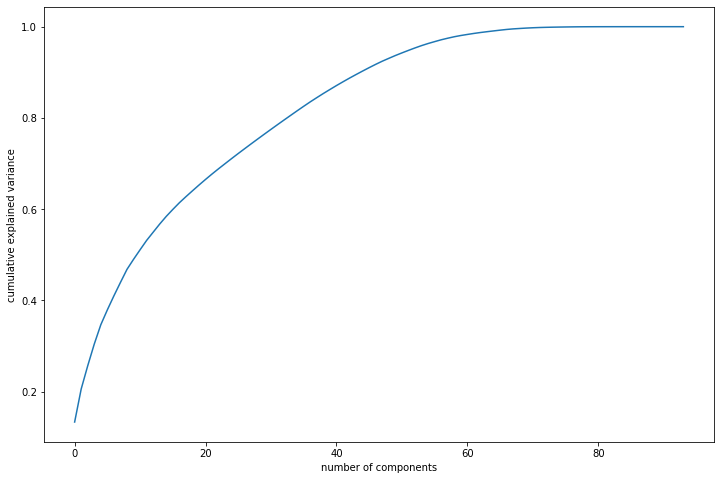

In [22]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [24]:
df_train_pca = pca_final.fit_transform(X_scaled)
df_train_pca.shape

(6819, 16)

In [25]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [26]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.04120473491951819 , min corr:  -0.04679350505853739


In [27]:
df_test_pca = pca_final.transform(X_scaled)
df_test_pca.shape

(6819, 16)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y)

In [29]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [30]:
pca_again = PCA(0.95)

In [31]:
df_train_pca2 = pca_again.fit_transform(x_train)
df_train_pca2.shape

(4568, 47)

In [32]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
df_test_pca2 = pca_again.transform(x_test)
df_test_pca2.shape

(2251, 47)

In [34]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [35]:
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.82'

In [36]:
from sklearn.linear_model import LogisticRegression
lr_fit = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000).fit(df_train_pca2,y_train)

In [39]:
lr_pred = lr_fit.predict_proba(df_test_pca2)

In [40]:
lr_pred = lr_pred[:,1]

In [45]:
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test,  lr_pred)

In [46]:
  #fpr, tpr for AUC
lr_auc = metrics.roc_auc_score(y_test,lr_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table.set_index('classifiers', inplace=True)
result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':lr_auc}, ignore_index=True)

print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.836


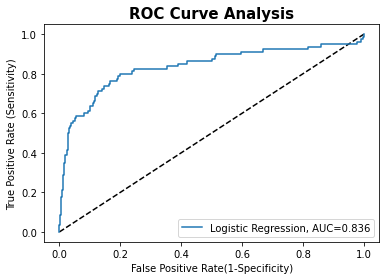

              precision    recall  f1-score   support

  Fin.Stable       0.97      1.00      0.98      2171
Fin.Unstable       0.50      0.09      0.15        80

    accuracy                           0.96      2251
   macro avg       0.73      0.54      0.57      2251
weighted avg       0.95      0.96      0.95      2251

Confusion Matrix : 
 [[2164    7]
 [  73    7]]


In [47]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()
yhat = lr_fit.predict(df_test_pca2,)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)
print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

In [49]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,random_state=123,subsample=0.8,n_estimators=600)
gbc_fit = gbc.fit(df_train_pca2,y_train)

In [51]:
gbc_pred = gbc_fit.predict_proba(df_test_pca2)
gbc_pred = gbc_pred[:,1]

gbc_fpr, gbc_tpr, _ = metrics.roc_curve(y_test,  gbc_pred)
gbc_auc = metrics.roc_auc_score(y_test,gbc_pred)

result_table = result_table.append({'classifiers':"Gradient Boosted Classifier",
                                    'fpr':gbc_fpr, 
                                    'tpr':gbc_tpr, 
                                    'auc':gbc_auc}, ignore_index=True)


print('Gradient Boosted Classifier AUC=%.3f' % (gbc_auc))

Gradient Boosted Classifier AUC=0.885
